# Run MCMC sampling
# Heavy minimal WITH geometry

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

In [2]:
import numpy as np

from Likelihood import LEff
from mcmc_utils import dark_nus_mcmc

from multiprocessing import Pool
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [3]:
hierarchy = 'heavy'
D_or_M = 'majorana'
distance = 'log'
smoothing_pars = (0.1, 0.1)

In [4]:
spec = 'minimal with geometry'

In [5]:
this_dark_nus_mcmc = dark_nus_mcmc(hierarchy, D_or_M, title_addition=spec,
                                   distance='log', smoothing_pars=(0.1, 0.1))
df = this_dark_nus_mcmc.provide_df('cut_based')

heavy majorana


In [6]:
ndim = 3
from ctau_utils import ctau_heavy
def heavy_minimal_posterior(parameters):
    '''Posterior in the minimal model: parameters = [m4, mz, mu_Vmu4_alpha_epsilon2]
       It uses global pars to speed up parallel computation'''
    if (parameters[0] < this_dark_nus_mcmc.exp_analysis_obj.m4_limits[0]) or\
       (parameters[0] > this_dark_nus_mcmc.exp_analysis_obj.m4_limits[1]) or\
       (parameters[1] < this_dark_nus_mcmc.exp_analysis_obj.mz_limits[0]) or\
       (parameters[1] > this_dark_nus_mcmc.exp_analysis_obj.mz_limits[1] or\
       (parameters[0] >= parameters[1])) or\
       (parameters[2] <= 0) or\
       (parameters[2] > this_dark_nus_mcmc.exp_analysis_obj.upper_bound_mu_minimal):
        return -np.inf, -np.inf, -np.inf, -np.inf
    else:
        actual_Vmu4_alpha_epsilon2 = this_dark_nus_mcmc.exp_analysis_obj.Vmu4_alpha_epsilon2 * parameters[2]
        ctau = ctau_heavy(parameters[0], 
                          parameters[1], 
                          actual_Vmu4_alpha_epsilon2, 
                          D_or_M)
        mu, sigma2 = this_dark_nus_mcmc.exp_analysis_obj.kde_n_events(df=df,
                                                         m4mz=(parameters[0], parameters[1]),
                                                         ctau=ctau,
                                                         mu=parameters[2],
                                                         distance=this_dark_nus_mcmc.distance,
                                                         smoothing=this_dark_nus_mcmc.smoothing_pars)
        return LEff(0, mu, sigma2), mu, sigma2, ctau

labels = [r'$m_4$ [GeV]', r'$m_Z$ [GeV]', r'$\mu$']
physics_labels = [r'$\log_{10}(V_{\mu 4}\alpha \epsilon^2)$', r'$\log_{10}(c\tau$)']
blobs_dtype = [('mu', float), ('sigma2', float), ('ctau', float)]

In [7]:
this_dark_nus_mcmc.set_posterior(heavy_minimal_posterior, 
                                 ndim, 
                                 ctau=ctau_heavy, 
                                 labels=labels)

In [8]:
n_walkers = 9
n_samples = 5000
with Pool() as pool:
    this_dark_nus_mcmc.initialise_mcmc(n_walkers, pool, log_mu=True, print_p0=True,
                                       set_backend=True, blobs_dtype=blobs_dtype)
    this_dark_nus_mcmc.run_mcmc(n_samples)

[2.66662363e-01 7.72928747e+00 2.18899784e+05] (-152699.80786404014, 153910.4534175929, 2446.952613231223, 60.887976384391585)
[0.6412983  6.69525935 6.73315115] (-0.4153785209133331, 0.0025574132436097267, 0.0013089317196956943, 13854.104844071135)
[0.69110893 8.42367224 5.74086113] (-0.5266539075444211, 9.034976011468716e-05, 6.262510536567467e-05, 28010.697375560572)
[2.34474747e-02 9.13236582e+00 1.24227432e+04] (0, 0.0, 0.0, 397798332.7753513)
[1.74090475e-02 9.59076955e+00 1.06486832e+02] (0, 0.0, 0.0, 250190325462.49866)
[6.44933990e-01 8.05396443e+00 4.78968854e+03] (-69.23788015791979, 71.25999624452363, 4.329988671393943, 39.64449338210905)
[ 0.53261559  6.86994081 30.44154214] (-0.3574580389036043, 0.06829449746428681, 0.023788512990066416, 8596.142267626019)
[7.91138782e-02 1.77318264e+00 1.23095523e+05] (-38123504.644348145, 39111111.31406302, 2043731.0647054398, 130.47758362927166)
[2.65720664e-02 6.68325975e+00 9.34119429e+05] (-922.4029104994515, 1329.7461046791045, 132

100%|██████████| 5000/5000 [31:54<00:00,  2.61it/s]


In [9]:
this_dark_nus_mcmc.compute_autocorrelation_time()

N/50 = 100;
tau: [253.61800119 262.13538002 334.26768159]


array([253.61800119, 262.13538002, 334.26768159])

In [15]:
this_dark_nus_mcmc.get_raw_and_processed_chains(physics_labels=physics_labels)

N/50 = 100;
tau: [253.61800119 262.13538002 334.26768159]


(<Figure size 864x504 with 4 Axes>,
 array([<AxesSubplot:ylabel='$m_4$ [GeV]'>,
        <AxesSubplot:ylabel='$m_Z$ [GeV]'>, <AxesSubplot:ylabel='$\\mu$'>,
        <AxesSubplot:xlabel='step number', ylabel='log(p)'>], dtype=object))

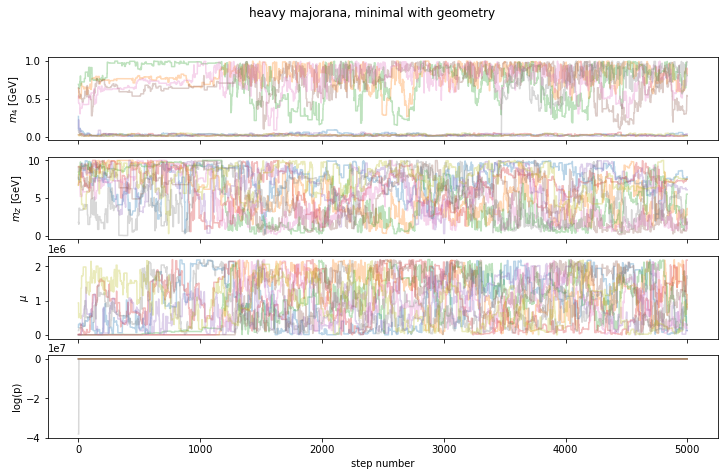

In [16]:
this_dark_nus_mcmc.plot_chains(store=True)

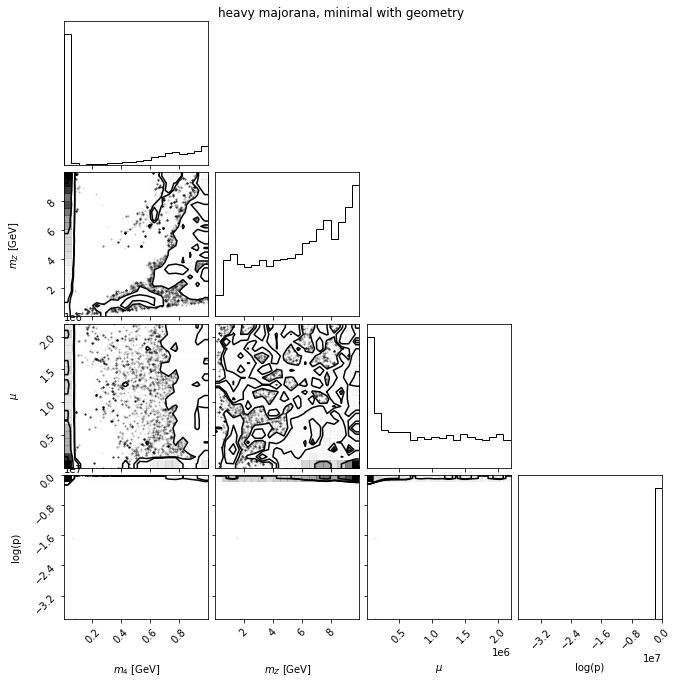

In [17]:
this_dark_nus_mcmc.corner_plot_raw(store=True)

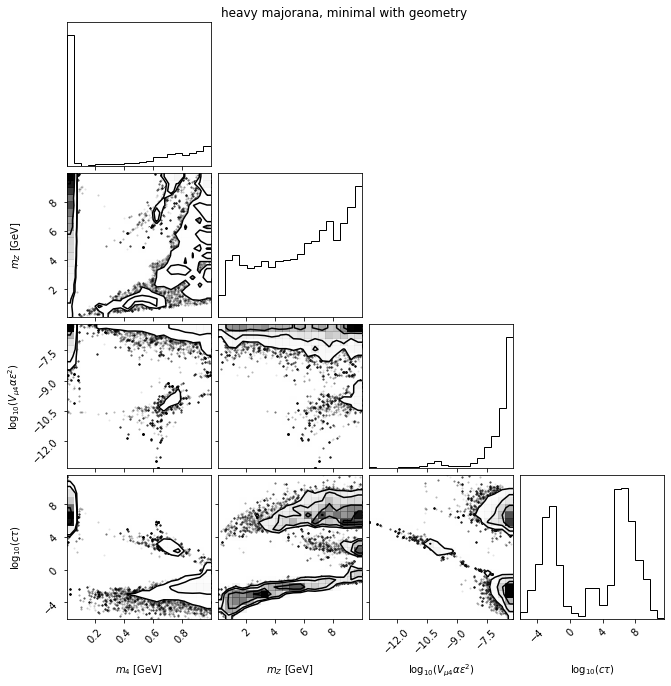

In [18]:
this_dark_nus_mcmc.corner_plot_physics(store=True)